# <div style="text-align: right"> Назарьин Артем, НПМбд-01-19 </div>

# Домашнее задание 6: Методы оптимизации в машинном обучении

Импортируем необходимые библиотеки:

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import oracles
import optimization
import presubmit_tests as pt
from plot_trajectory_2d import plot_levels, plot_trajectory
from sklearn.datasets import load_svmlight_file
import time

Проведем тесты из файла <strong> presubmit_tests.py </strong>:

In [3]:
pt.test_python3()
pt.test_QuadraticOracle()
pt.test_log_reg_usual()
pt.test_log_reg_oracle_calls()
pt.test_grad_finite_diff_1()
pt.test_grad_finite_diff_2()
pt.test_hess_finite_diff_1()
pt.test_hess_finite_diff_2()
pt.test_line_search()
pt.test_gd_basic()
pt.test_newton_basic()
pt.test_newton_1d()
pt.test_newton_fail()

Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]
Iteration 0: x_k = [1. 1.]


# Эксперименты

## Эксперимент 1.1: Траектория градиентного спуска на квадратичной функции

Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: придумайте две-три квадратичные двумерные функции, на которых работа метода будет отличаться, нарисуйте графики с линиями уровня функций и траекториями методов.

In [18]:
x_start = np.array([[5., 7.], [3., -6.], [0., 2.]])
methods = [{'method': 'Constant', 'c': 0.1}, 
           {'method': 'Armijo', 'alpha_0':1.0, 'c1':0.5}, 
           {"method":'Wolfe', 'c1':1e-4, 'c2':0.9, 'alpha_0':1.0}]

In [11]:
A = np.array([[2.1, 0.], [0., 1.3]])
b = np.zeros(2)
oracle = oracles.QuadraticOracle(A, b)
print('Число обусловленности:', np.linalg.cond(A))

Число обусловленности: 1.6153846153846154


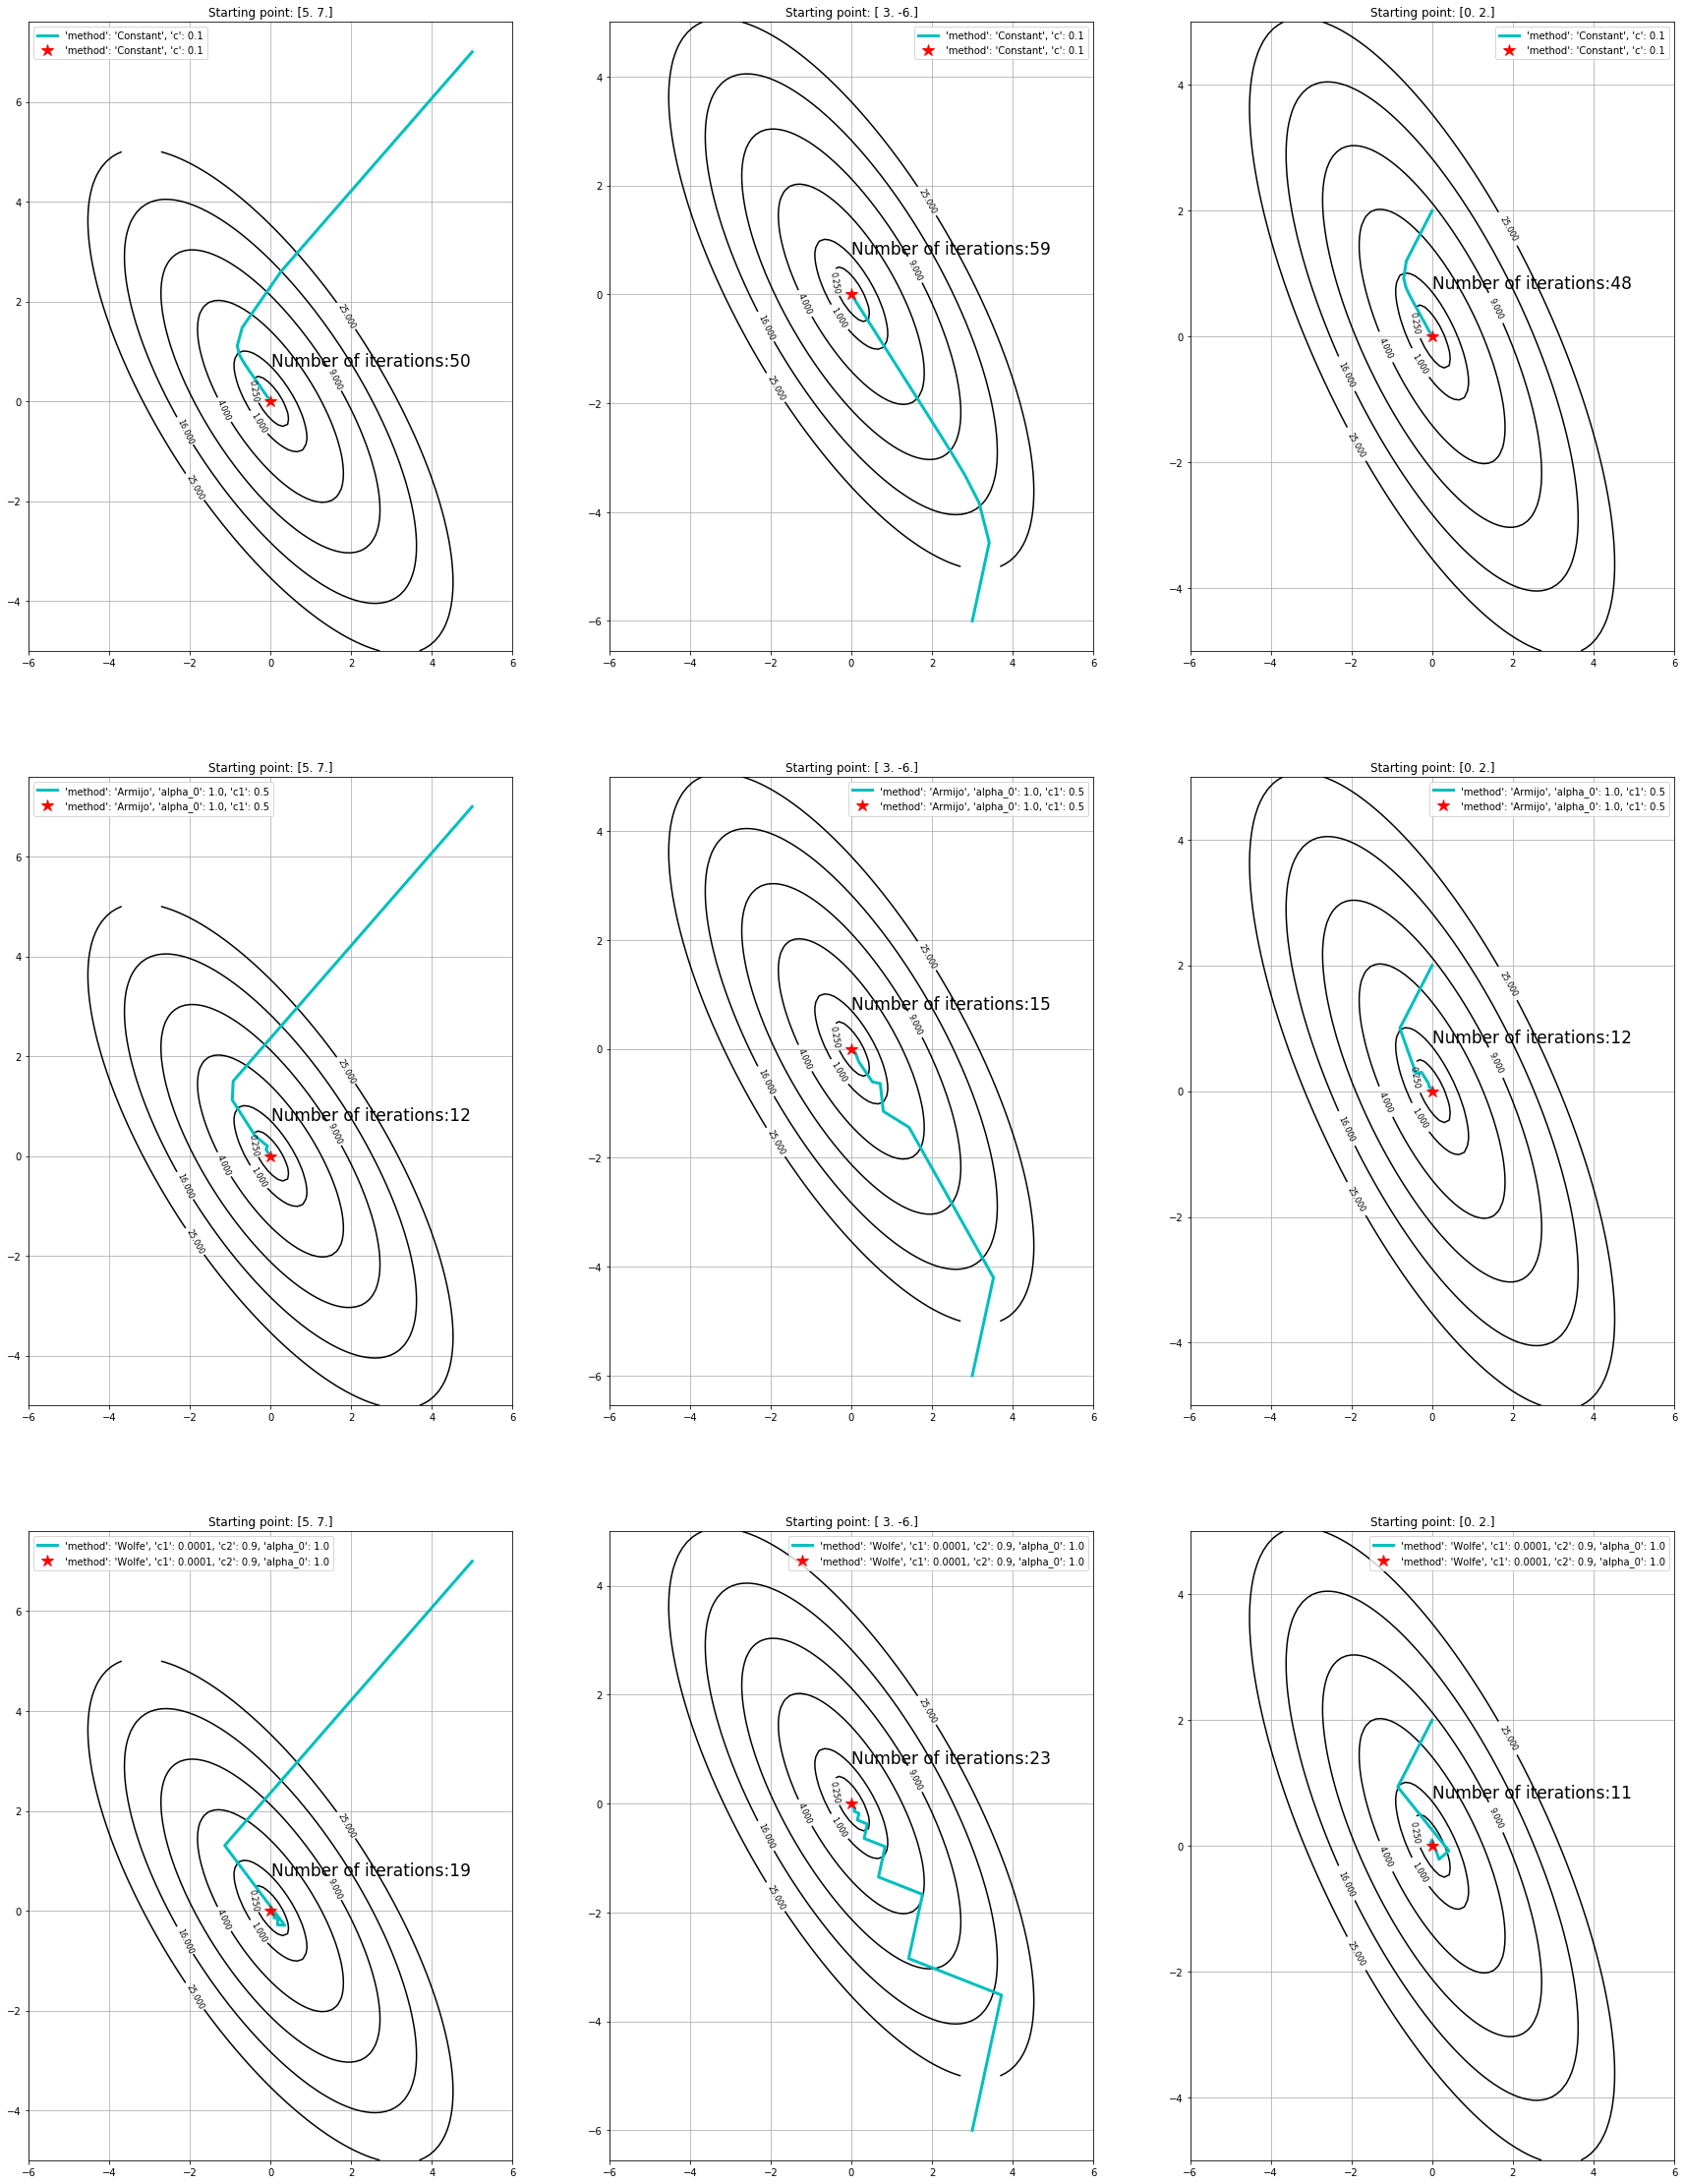

In [21]:
fig, ax = plt.subplots(len(methods), len(x_start), figsize = (30,40))
def graph_func(methods):
    for i in range(len(methods)):
        for j in range(len(x_start)):
            [x_star, msg, history] = optimization.gradient_descent(oracle, x_start[j], line_search_options = methods[i], trace=True)
            plot_levels(oracle.func, ax[i][j])
            plot_trajectory(oracle.func, ax[i][j], history['x'], label=str(methods[i])[1:-1])
            ax[i][j].set_title('Starting point: ' + str(x_start[j]))
            ax[i][j].text(.01, .99, 'Number of iterations:' + str(len(history['x']) - 1), 
                              horizontalalignment='left',
                              verticalalignment='top', fontsize=17)
            ax[i][j].legend()
graph_func(methods)

In [19]:
A = np.array([[5.0, 3.2], [3.2, 4.0]])
b = np.zeros(2)
oracle = oracles.QuadraticOracle(A, b)
print('Число обусловленности:', np.linalg.cond(A))

Число обусловленности: 6.1362133743097385


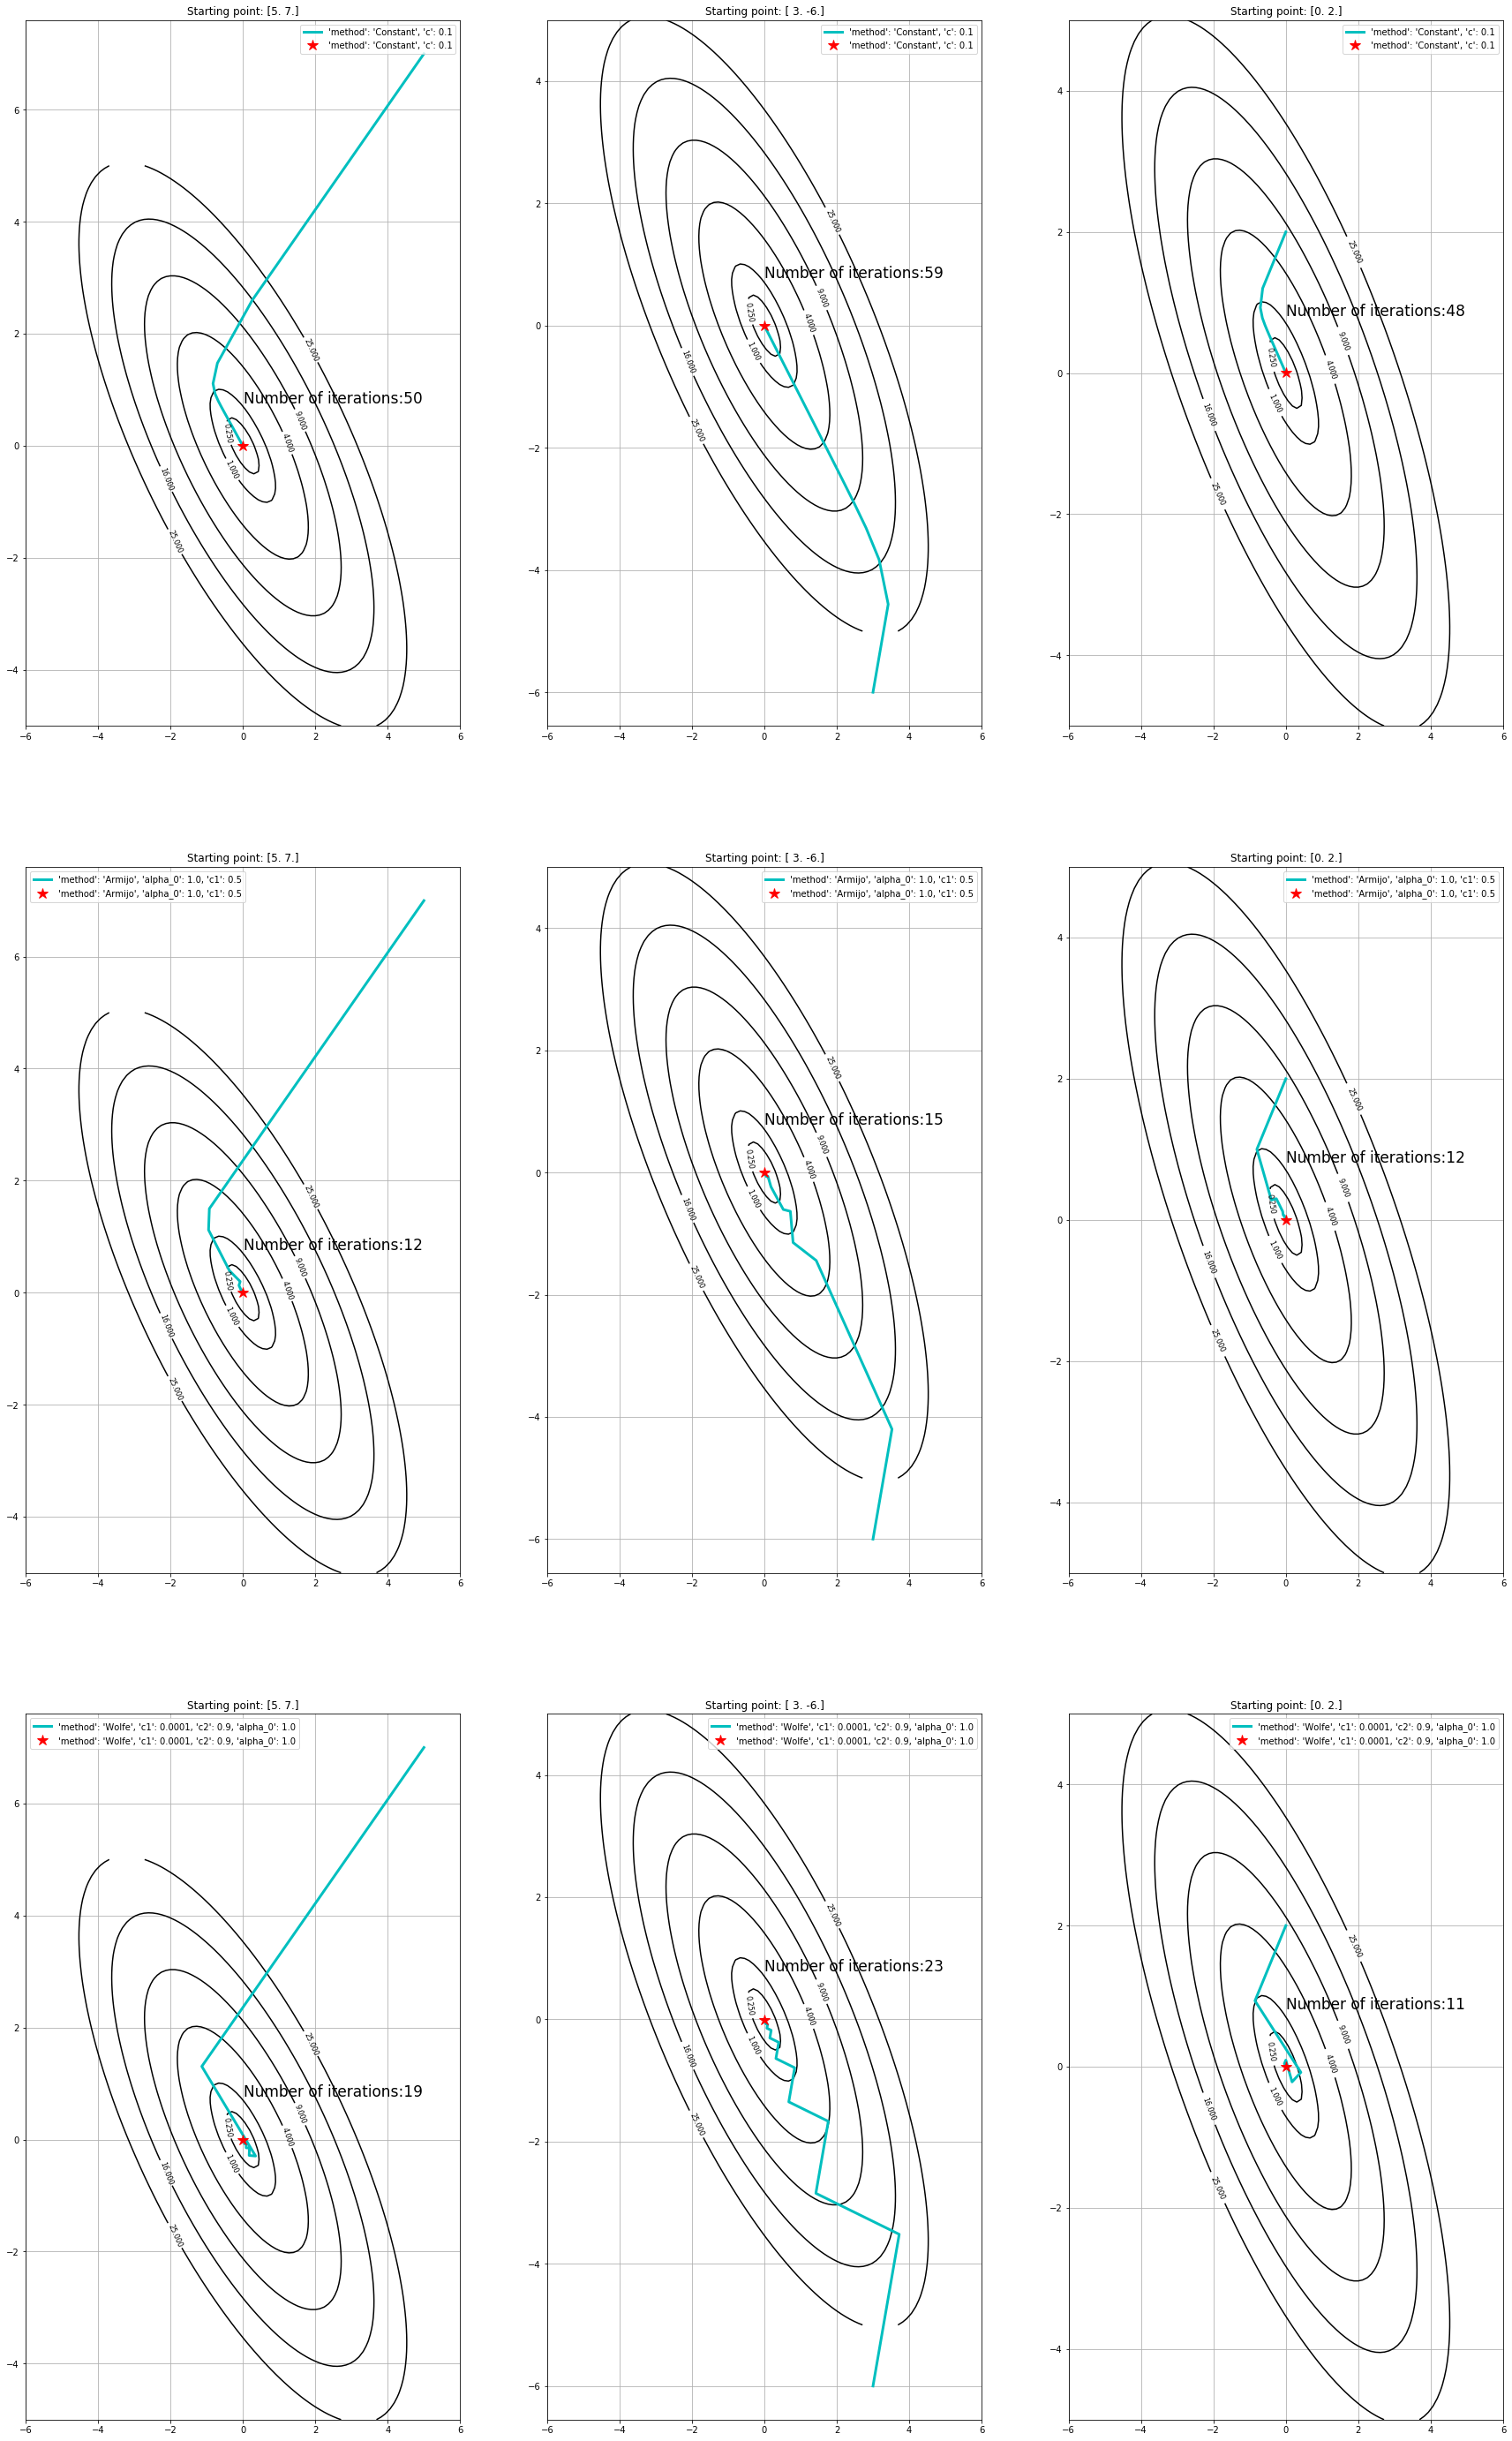

In [20]:
fig, ax = plt.subplots(len(methods), len(x_start), figsize = (30,50))
graph_func(methods)

<strong> Выводы: Чем больше число обусловленности матрицы, тем больше итераций; больше всего итераций совершается при работе константного метода; число итераций также увеличивается при отдалении от искомого минимума постановок начальных точек. </strong>

# Эксперимент 2: Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства

Исследуем, как зависит число итераций, необходимое градиентному спуску для сходимости, от следующих двух параметров: 1) числа обусловленности κ ≥ 1 оптимизируемой функции и 2) размерности пространства n оптимизируемых переменных.

Для этого для заданных параметров n и κ сгенерируем случайным образом квадратичную задачу размера n с числом обусловленности κ и запустим на ней градиентный спуск с некоторой фиксированной требуемой точностью. Замерим число итераций T(n,κ), которое потребовалось сделать методу до сходимости (успешному выходу по критерию остановки).

Зафиксируем некоторое значение размерности n. Переберем различные числа обусловленности κ по сетке и построим график зависимости T(κ,n) против κ. Поскольку каждый раз квадратичная задача генерируется случайным образом, то повторим этот эксперимент несколько раз. В результате для фиксированного значения n у нас получится целое семейство кривых зависимости T(κ,n) от κ. Нарисуем все эти кривые одним и тем же цветом для наглядности.

Теперь увеличим значение n и повторим эксперимент снова. Получим новое семейство кривых T(n′,κ) против κ. Нарисуем их все одним и тем же цветом, но отличным от предыдущего (например, синим).

Повторим эту процедуру несколько раз для других значений n. В итоге получим несколько разных семейств кривых — часть красных (соответствующих одному значению n), часть синих (соответствующих другому значению n), часть зеленых и т. д.

Обратим внимание, что значения размерности n имеет смысл перебирать по логарифмической сетке (например, n = 10, n = 100, n = 1000 и т. д.).

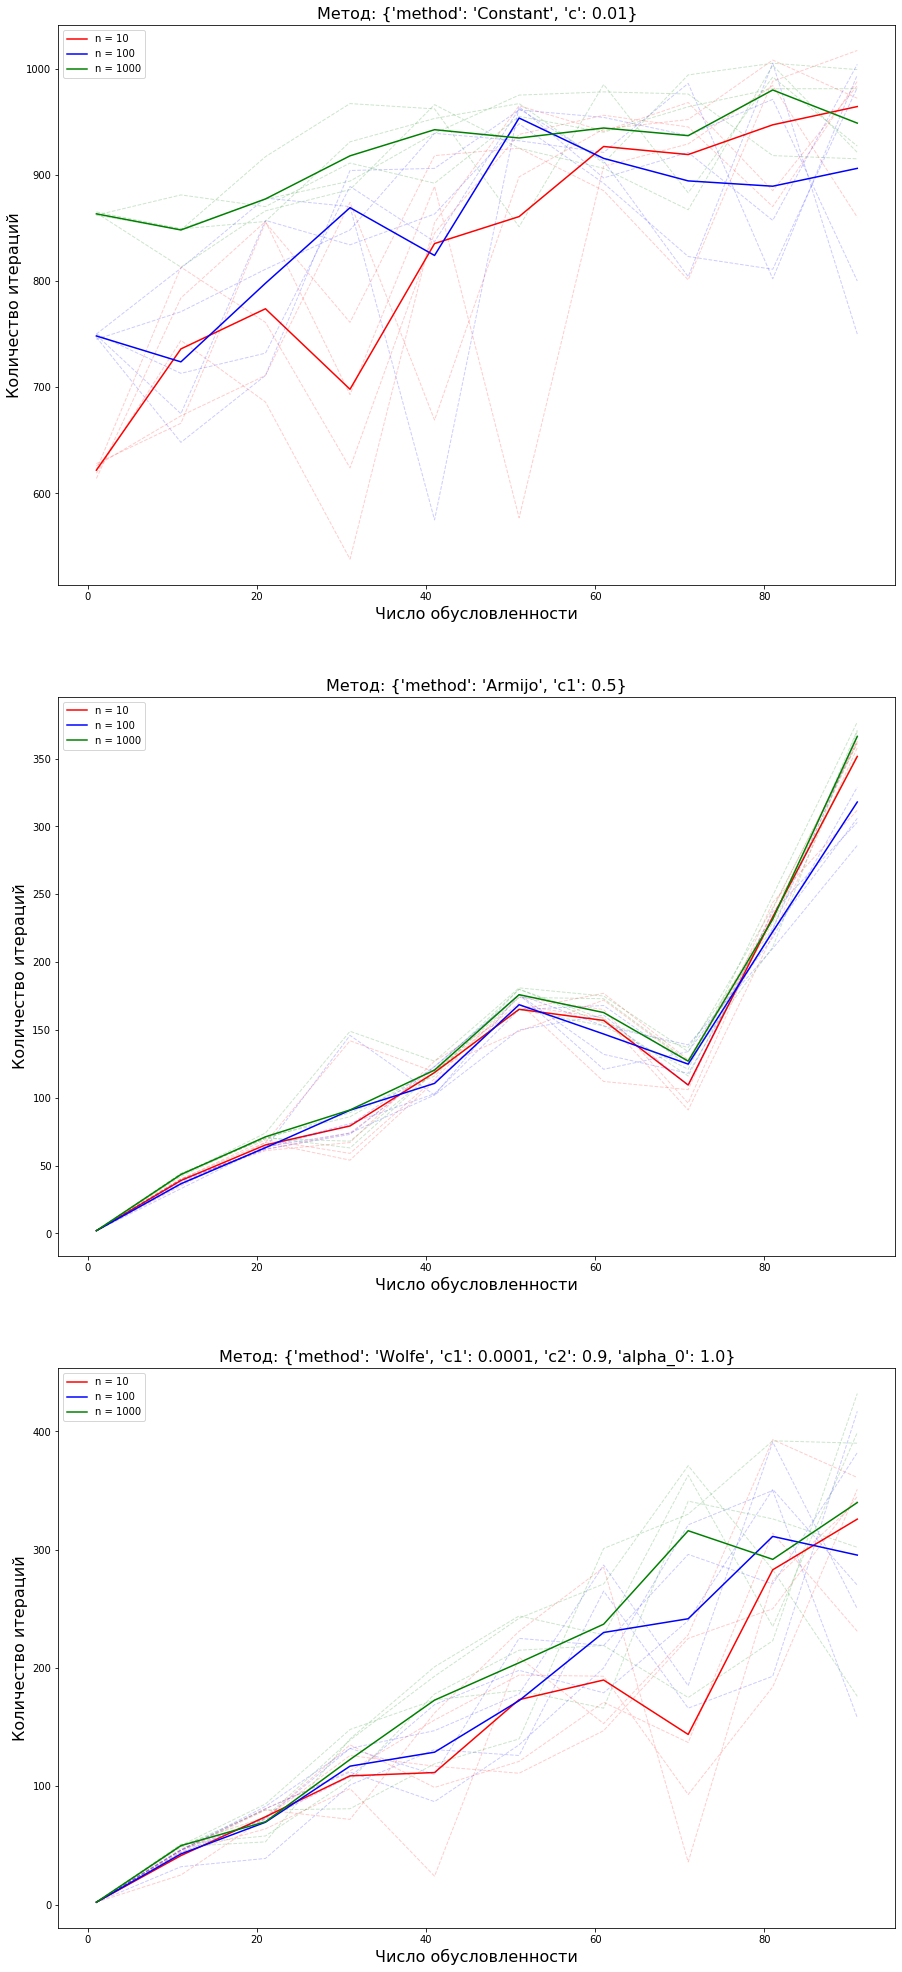

In [44]:
size = [(10, 'r', 'n = 10'), (100, 'b', 'n = 100'), (1000, 'g', 'n = 1000')]
K = np.arange(1, 101, 10)
methods = [{'method': 'Constant', 'c': 0.01}, {'method': 'Armijo', 'c1':0.5}, 
           {"method":'Wolfe', 'c1':1e-4, 'c2':0.9, 'alpha_0':1.0}]


fig, ax = plt.subplots(3, 1, figsize=(15,35))

for j in range(len(methods)):
    for s in size:
        T = np.zeros(len(K))
        for i in range(5):
            it = []
            for k in K:
                a = np.random.uniform(1, k, s[0])
                a[0] = 1
                a[-1] = k
                A = scipy.sparse.diags(a)
                b = np.random.rand(s[0]) * k
                oracle = oracles.QuadraticOracle(A, b)
                _, _, history = optimization.gradient_descent(oracle, np.zeros(s[0]), line_search_options = methods[j], 
                                                              trace=True)
                it.append(len(history['grad_norm']))
            T = T + np.array(it)
            ax[j].plot(K, it, s[1] + '--', linewidth=1, alpha=0.2)
        ax[j].plot(K, T/5, s[1], label = s[2])
        ax[j].set_title('Метод: ' + str(methods[j]), fontsize = 16)
        ax[j].set_xlabel('Число обусловленности', fontsize = 16)
        ax[j].set_ylabel('Количество итераций', fontsize = 16)
        ax[j].legend()

<strong> Выводы: Чем больше число обусловленности матрицы, тем больше итераций; величина размерности не очень сильно влияет на число итераций, но в константном методе в среднем итераций больше там, где больше размерность. </strong>

#  Эксперимент 3: Сравнение методов градиентного спуска и Ньютона на реальной задаче логистической регрессии
Сравним методы градиентного спуска и Ньютона на задаче обучения логистической регрессии на реальных данных. 

В качестве реальных данных используем следующие три набора с сайта LIBSVM3: w8a, gisette и real-sim. Коэффициент регуляризации возьмем стандартным образом: λ = 1/m.

Параметры обоих методов возьмем равными параметрам по умолчанию. Начальную точку выберем 
 = 0.

Построим графики сходимости следующих двух видов:

Зависимость значения функции от реального времени работы метода.
Зависимость относительного квадрата нормы градиента 
 (в логарифмической шкале) против реального времени работы.

Зависимость относительного квадрата нормы градиента $\frac{\vert\vert \nabla f(x_k) \vert\vert_2^2}{\vert\vert \nabla f(x_0) \vert\vert_2^2}$ (в логарифмической шкале) против реального времени работы.

In [45]:
def compare_graphs(svm_file):
    start_time = time.time()
    fig, ax = plt.subplots(1, 2, figsize=(20,5))
    A, b = load_svmlight_file(svm_file)
    regcoef = 1 / len(b)
    oracle = oracles.create_log_reg_oracle(A, b, regcoef)
    
    _, _, history_gd = optimization.gradient_descent(oracle, np.zeros(A.shape[1]), trace=True)
    ax[0].plot(history_gd['time'], history_gd['func'], label='Градиентный спуск')

    _, _, history_n = optimization.newton(oracle, np.zeros(A.shape[1]), trace=True)
    ax[0].plot(history_n['time'], history_n['func'], label='Метод Ньютона')
    
    ax[0].set_xlabel('Время работы')
    ax[0].set_ylabel('Значение функции')
    ax[0].legend()

    ax[1].plot(history_gd['time'], np.array(history_gd['grad_norm']) ** 2 / history_gd['grad_norm'][0] ** 2, label="Градиентный спуск")
    ax[1].plot(history_n['time'], np.array(history_n['grad_norm']) ** 2 / history_n['grad_norm'][0] ** 2, label="Метод Ньютона")
    
    ax[1].set_yscale('log')
    ax[1].set_xlabel('Время работы')
    ax[1].set_ylabel('Относительный квадрат нормы градиента')
    ax[1].legend()
    print(" %s seconds " % (time.time() - start_time))

 2.20143985748291 seconds 


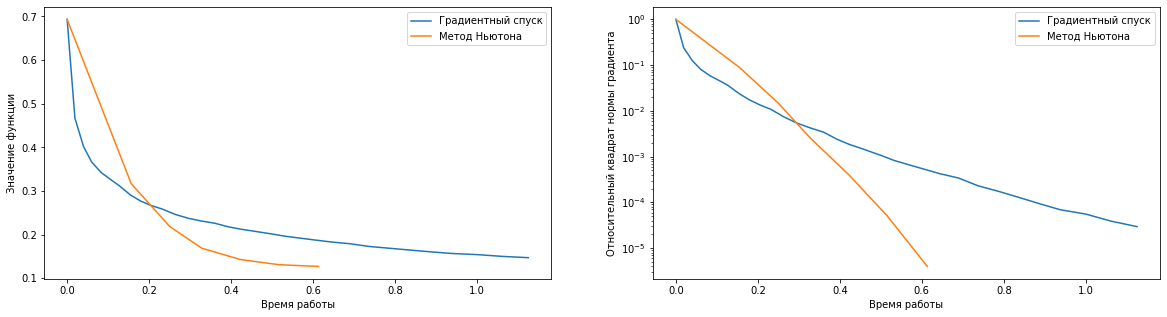

In [46]:
compare_graphs('данные/w8a.txt')

 632.4688363075256 seconds 


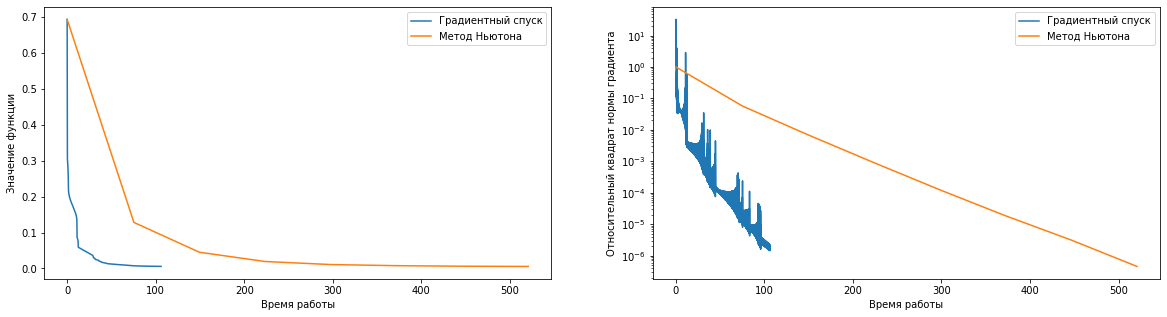

In [48]:
compare_graphs('данные/gisette_scale.t.bz2')

<strong> Выводы: В данных w8a градиентный спуск быстрее работает в начале, но медленнее в конце. В данных gisette_scale градиентный спуск сработал гораздо быстрее. </strong>